# Kaggle Dataset uploading steps:

In [9]:
 ! pip install -q kaggle

In [17]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arjunbhushan005","key":"8241636eddc5cf4f6d8b11aae4738dfc"}'}

In [19]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 426M/427M [00:20<00:00, 23.6MB/s]
100% 427M/427M [00:20<00:00, 22.0MB/s]


In [22]:
import zipfile
import os

dataset_path = "/content/waste-classification-data.zip"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")


os.listdir("dataset")


['DATASET', 'dataset']

# Developing the CNN Model

In [23]:
pip install opencv-python

In [24]:
pip install tensorflow

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [31]:
train_path = "/content/dataset/DATASET/TRAIN"
test_path = "/content/dataset/DATASET/TEST"

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [32]:
#Visualization

from cv2 import cvtColor

x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2192.70it/s]


In [33]:
data.shape

(22564, 2)

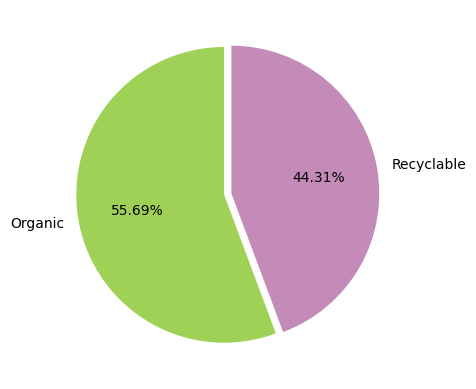

In [34]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels = ['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 90, explode = [0.025,0.025])
plt.show()

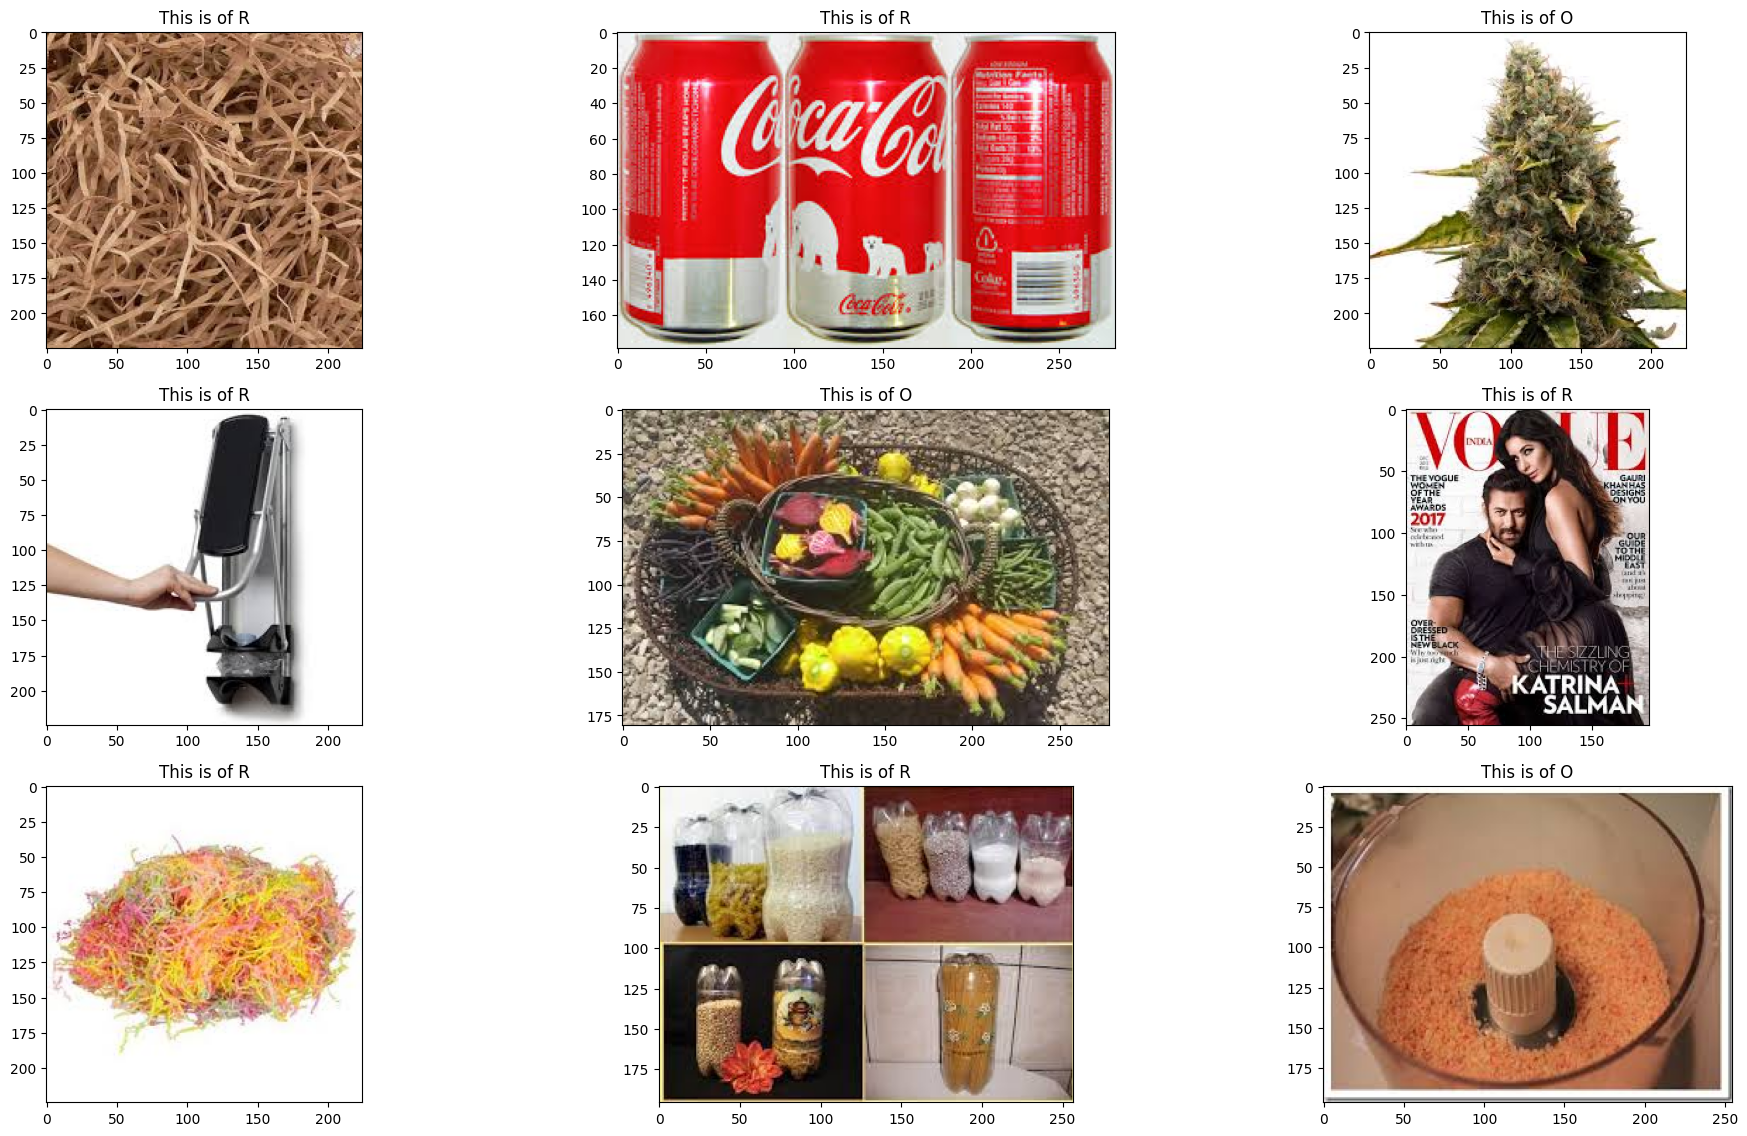

In [35]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [41]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 98s 815ms/step - accuracy: 0.7042 - loss: 0.7394 - val_accuracy: 0.8563 - val_loss: 0.3891
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8160 - loss: 0.4403 - val_accuracy: 0.8735 - val_loss: 0.3118
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 570ms/step - accuracy: 0.8437 - loss: 0.3859 - val_accuracy: 0.8902 - val_loss: 0.3038
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 566ms/step - accuracy: 0.8556 - loss: 0.3589 - val_accuracy: 0.8846 - val_loss: 0.2870
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 571ms/step - accuracy: 0.8638 - loss: 0.3341 - val_accuracy: 0.8902 - val_loss: 0.2866
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 571ms/step - accuracy: 0.8779 - loss: 0.3014 - val_accuracy: 0.8882 - val_loss: 0.2906
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 583ms/step - accuracy: 0.8952 - loss: 0.2629 - val_accuracy: 0.9061 - val_loss: 0.2404
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.9110 - loss: 0.2291 - val_accu